# Chem 30324, Spring 2020, Homework 9

# Devon Ngo


## Due April 10, 2020


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## The two-state system.
### Consider a closed system containing $N$ objects, each of which can be in one of two energy states, of energy either 0 or $\varepsilon$. The total internal energy $U$ of the box is the sum of the energies of the individual objects.

![Boltzmann](imgs/Boltzmann.png)

### 1. Write down all the possible microstates for a box in which $N = 4$ and the internal energy $U = 2\varepsilon$.

Total number of microstates = $\frac{4*3}{2} = 6$ 

- 1 1 0 0
- 1 0 1 0
- 1 0 0 1
- 0 1 1 0
- 0 1 0 1
- 0 0 1 1

### 2. What does the postulate of *equal a priori probabilities* say about the relative likelihood of occurance of any one of these microstates?

The relative likelihood of occurance of any one of these microstates is equally likely to each other. This means it is equally likely to find any one of the microstates occuring.

### 3. What is the entropy of the box? (Thank you, Ludwig Boltzmann.)

The entropy of the box is found by $S = k*ln(\Omega)$, so in this case it is:

In [35]:
kb = 1.38065E-23 # J/K
omega = 6

S = kb * np.log(omega)

print("S = {:.3e} J/K.".format(S))

S = 2.474e-23 J/K.


### 4. Suppose two identical such boxes are brought into thermal contact and allowed to come to equilibrium. Calculate the change in internal energy $\Delta U$ and in entropy $\Delta S$ associated with this process.

We know that for each box, we have $N = 4$ and $U = 2\varepsilon$. Both U and N are additive, so for this new system, we have a total of $N = 8$ and $U = 4\varepsilon$. Assuming $q=4$, we can find $\Omega = (_{8}C_{4})$. Plugging $\Omega$ into the equation for S, we can find the difference by subtracting the total from the initial two entropies. We can find $\Delta U$ by finding the difference between the total and initial $U$.

For $\Delta U$, we find that:

$\Delta U = 4\varepsilon - 2 * (2\varepsilon) = 0$

In [32]:
N = 8
q = 4

omega = np.math.factorial(N) / ((np.math.factorial(q)*np.math.factorial(N-q)))

Stot = kb * np.log(omega)

deltaS = Stot - (2 * S)

print("The change in entropy is {:.3e} J/K.".format(deltaS))


The change in entropy is 9.181e-24 J/K.


## The canonical ensemble.
### The energy spectrum of some molecule is described by the diagram below.  A large number $N$ of these distinguishable molecules is in thermal equilibrium with a much larger reservoir of temperature $T$.

![Energy States](imgs/EnergyStates.png)

### 5. Write the partition function $q$ for one of the molecules in the system (a) in terms of $T$ and $\varepsilon$, (b) in terms of $\beta = 1/k_B T$ and $\varepsilon$, and (c) in terms of a characteristic temperature $\theta = \varepsilon/k_B$.

For one molecule, the general partition function is: $$ q(T) = \sum\limits_{i} exp(-\frac{\varepsilon _i}{k_BT})$$

Putting it together, we have:

(a) $q(T) = 1 + exp(-\frac{\varepsilon}{k_BT}) + exp(-\frac{2\varepsilon _i}{k_BT})$

(b) $q(T) = 1 + exp(-\varepsilon \beta) + exp(-2\varepsilon \beta)$

(c) $q(T) = 1 + exp(-\frac{\theta}{T} ) + exp(-\frac{2\theta}{T})$

### 6. Plot the relative fractions of molecules of energy 0, $\varepsilon$, and $2\varepsilon$  vs. temperature.  Assume $\theta = 300$ K. Be sure to indicate the probabilities in the limits of $T\rightarrow 0$ and $T \rightarrow \infty$.

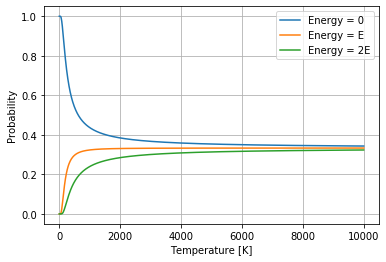

In [4]:
T = np.linspace(1, 10000, 1000)
q1 = np.ones(len(T)) # at energy equals 0, q = 1
q2 = np.zeros(len(T))
q3 = np.zeros(len(T))

theta = 300 # K



def part1(T, theta):
    return np.exp(-theta / T)

def part2(T, theta):
    return np.exp(-2 * theta / T)

for i in range(len(T)):
    q2[i] = part1(T[i], theta)
    q3[i] = part2(T[i], theta)

qtot = q1 + q2 + q3
plt.plot(T, q1/qtot, label='Energy = 0')
plt.plot(T, q2/qtot, label='Energy = E')
plt.plot(T, q3/qtot, label='Energy = 2E')
plt.xlabel('Temperature [K]')
plt.ylabel('Probability')
plt.legend()
plt.grid()
plt.show()

From the graph, we see that as $T \rightarrow 0$, the probability of molecules of energy 0 = 1 while the probability of molecules at energy = 0.

As $T \rightarrow \infty$, the probability of molecules of all energies = 0.333.

### 7. Derive an expression for the internal energy $U$ per molecule by summing over the possible microstates weighted by their probabilities. Plot the average energy vs. temperature, assuming  $\theta =300$ K.

The expression for internal energy is $U = N \sum \varepsilon_i P_i$. For this system, it is represented by:

$$U = N (0 * \frac{1}{q(T)} + \varepsilon\frac{exp(-\varepsilon \beta)}{q(T)} + 2\varepsilon\frac{exp(-2\varepsilon \beta)}{q(T)})$$

which can be simplified to:

$$U = N\varepsilon (\frac{exp(-\varepsilon \beta)}{q(T)} + \varepsilon\frac{exp(-2\varepsilon \beta)}{q(T)})$$

dividing by N results in the final equation:

$$\frac{U}{N} = \frac{\varepsilon exp(-\varepsilon \beta) + 2\varepsilon exp(-2\varepsilon \beta)}{q(T)}$$


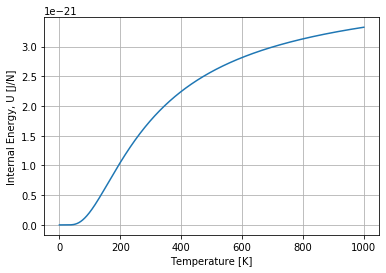

In [36]:
T1 = np.linspace(0.1, 1000, 1000)

ep = theta * kb

def beta(T):
    return 1 / (kb * T)

def Uq(b, ep):
    top = (ep * np.exp(-ep*b)) + (2 * ep * np.exp(-2*ep*b))
    bot = 1 + np.exp(-ep*b) + np.exp(-2*ep*b)
    return (top/bot)

Ud = np.zeros(len(T1))
b = np.zeros(len(T1))

for i in range(len(T1)):
    b[i] = beta(T1[i])
    Ud[i] = Uq(b[i], ep)
    
plt.plot(T1, Ud, label='derivative')
plt.xlabel('Temperature [K]')
plt.ylabel('Internal Energy, U [J/N]')
plt.grid()
plt.show()

### 8. Derive an expression for the internal energy $U$ per molecule by taking the appropriate derivative of the partition function from problem 5 (*Hint:* it is easier to work with the expressions in term of $\beta$ than in $T$.) Does your result agree with that from Question 7?

$$U = -(\frac{\partial lnQ}{\partial \beta}) = -N(\frac{\partial lnq}{\partial \beta}) = -\frac{N}{q} \frac{\partial q}{\partial \beta}$$

We know that:

$q(T) = 1 + exp(-\varepsilon \beta) + exp(-2\varepsilon \beta)$

$\frac{\partial q}{\partial \beta} = -\varepsilon exp(-\varepsilon \beta) - 2\varepsilon exp(-2\varepsilon \beta)$

Subbing the values in and dividing both sides by $N$, we get:

$$\frac{U}{N} =  \frac{\varepsilon exp(-\varepsilon \beta) + 2\varepsilon exp(-2\varepsilon \beta)}{q(T)} $$

This agrees with the result from Question 7.

### 9. Derive an expression for the Helmholtz energy $A$ per molecule from the partition function. Plot $A$ vs. temperature, assuming $\theta
= 300$ K.

We know that $A = U - TS$, which is equal to $A = -Nk_BTln(q)$ and finding the energy per molecule, we divide by $N$ to get $\frac{A}{N} = -k_BTln(q)$.

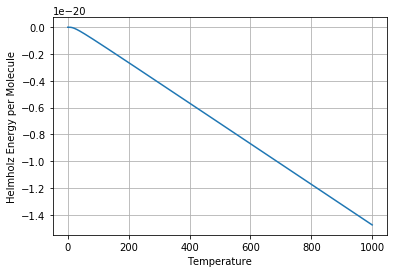

In [28]:
A = -kb * T1 * np.log(qtot)
    
plt.plot(T1, A)
plt.xlabel('Temperature')
plt.ylabel('Helmholz Energy per Molecule')
plt.grid()
plt.show()


### 10. Derive an expression for the entropy $S$ per molecules and plot vs. temperature, again assuming $\theta = 300$ K.

$\frac{S}{k_B} = \beta U + N ln(q)$

$\frac{S}{N} = \frac{U-A}{TN}= k_B(\beta \frac{U}{N} + ln(q)) = \frac{ \varepsilon e^{-\beta \varepsilon}+2 \varepsilon e^{-2 \beta \varepsilon}}{T(1 + e^{-\beta \varepsilon} + e^{-2 \beta \varepsilon})}+ k_B T ln(1 + e^{-\beta \varepsilon} + e^{-2 \beta \varepsilon})$

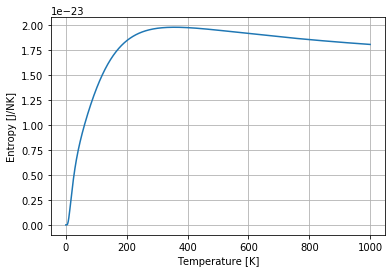

In [37]:
S = (Ud-A)/T1

plt.plot(T1, S)
plt.ylabel('Entropy [J/NK]')
plt.xlabel('Temperature [K]')
plt.grid()
plt.show()

### 11. In class we took the First Law as a postulate and demonstrated the Second Law. Look at your results for Problems 6 and 10. Can you use them to rationalize the Third Law? Explain your answer.

We can use them to rationalize the Third Law. The Third Law states that entropy at absolute zero equals zero. With problem 6, we see that the probability of the energy state to be 0 is 1. Plugging in an internal energy value of 0 at T = 0 for problem 10 shows that the entropy is also 0, and as temperature approaches 0, the entropy does likewise.